In [1]:
# imports

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

finding corners for image.. camera_cal/calibration1.jpg
can draw corners: False


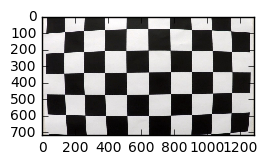

finding corners for image.. camera_cal/calibration10.jpg
can draw corners: True


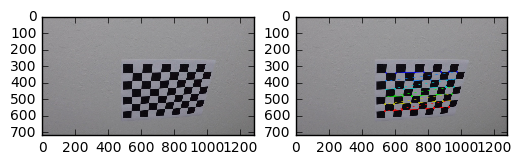

finding corners for image.. camera_cal/calibration11.jpg
can draw corners: True


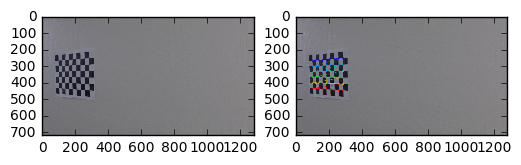

finding corners for image.. camera_cal/calibration12.jpg
can draw corners: True


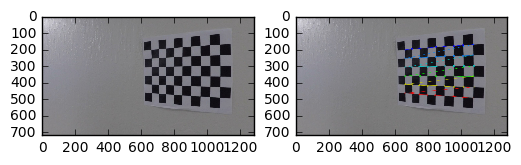

finding corners for image.. camera_cal/calibration13.jpg
can draw corners: True


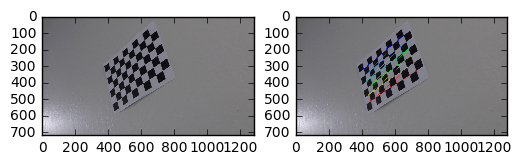

finding corners for image.. camera_cal/calibration14.jpg
can draw corners: True


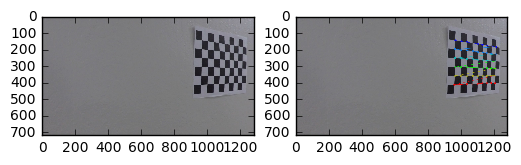

finding corners for image.. camera_cal/calibration15.jpg
can draw corners: True


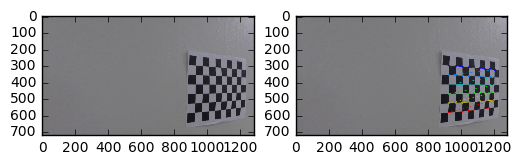

finding corners for image.. camera_cal/calibration16.jpg
can draw corners: True


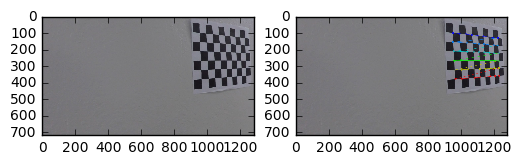

finding corners for image.. camera_cal/calibration17.jpg
can draw corners: True


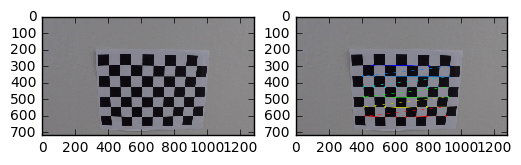

finding corners for image.. camera_cal/calibration18.jpg
can draw corners: True


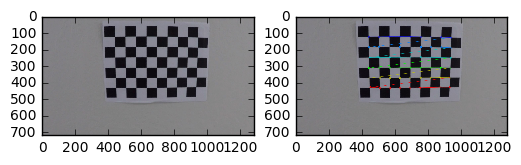

finding corners for image.. camera_cal/calibration19.jpg
can draw corners: True


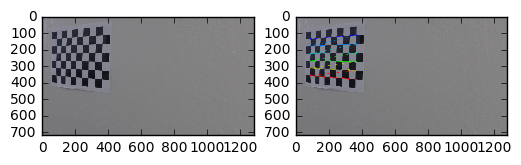

finding corners for image.. camera_cal/calibration2.jpg
can draw corners: True


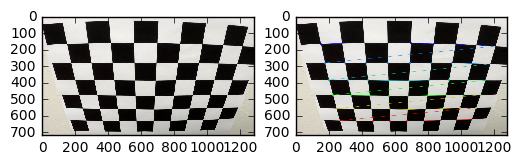

finding corners for image.. camera_cal/calibration20.jpg
can draw corners: True


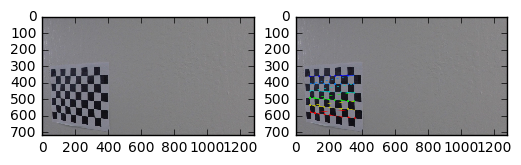

finding corners for image.. camera_cal/calibration3.jpg
can draw corners: True


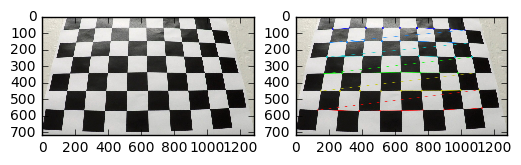

finding corners for image.. camera_cal/calibration4.jpg
can draw corners: False


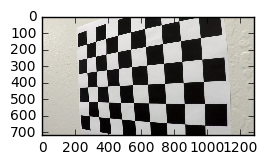

finding corners for image.. camera_cal/calibration5.jpg
can draw corners: False


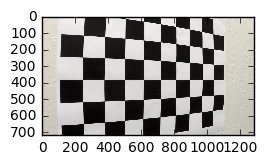

finding corners for image.. camera_cal/calibration6.jpg
can draw corners: True


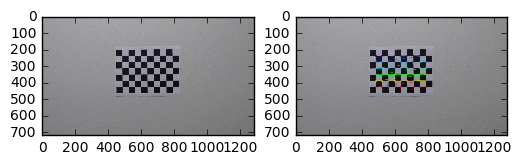

finding corners for image.. camera_cal/calibration7.jpg
can draw corners: True


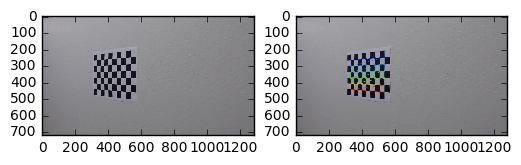

finding corners for image.. camera_cal/calibration8.jpg
can draw corners: True


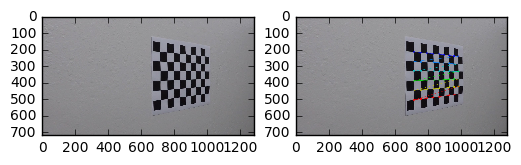

finding corners for image.. camera_cal/calibration9.jpg
can draw corners: True


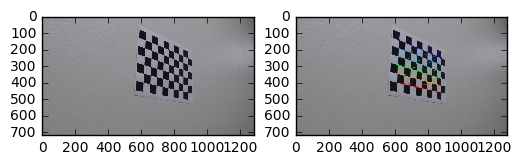

start calibration camera
show calibrated camera
undistorting image... camera_cal/calibration1.jpg


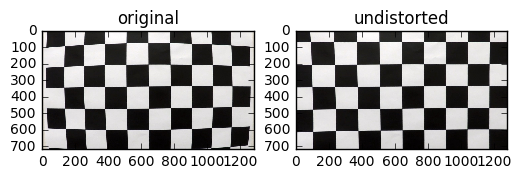

undistorting image... camera_cal/calibration10.jpg


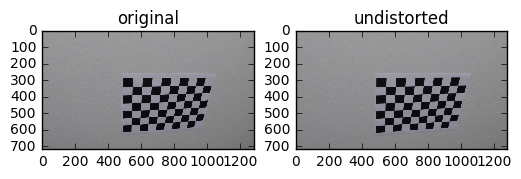

undistorting image... camera_cal/calibration11.jpg


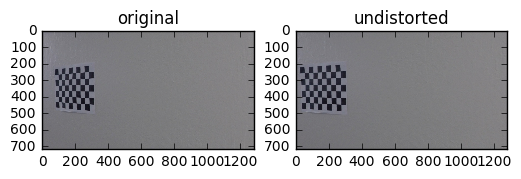

undistorting image... camera_cal/calibration12.jpg


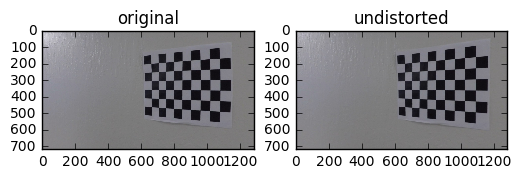

undistorting image... camera_cal/calibration13.jpg


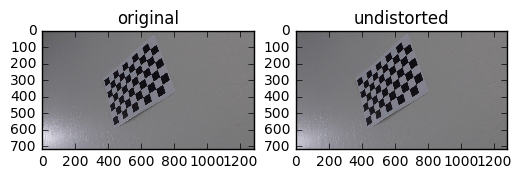

undistorting image... camera_cal/calibration14.jpg


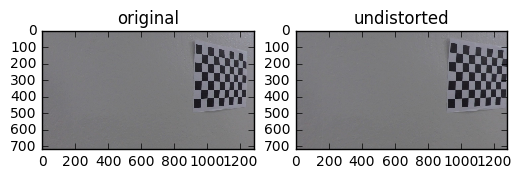

undistorting image... camera_cal/calibration15.jpg


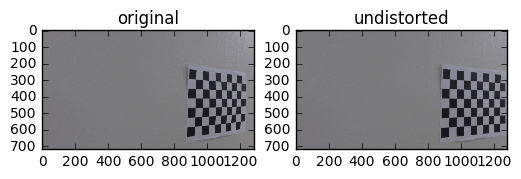

undistorting image... camera_cal/calibration16.jpg


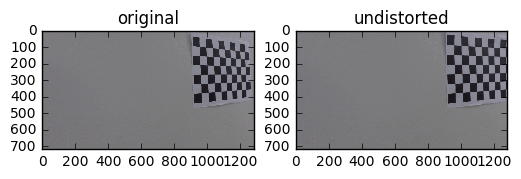

undistorting image... camera_cal/calibration17.jpg


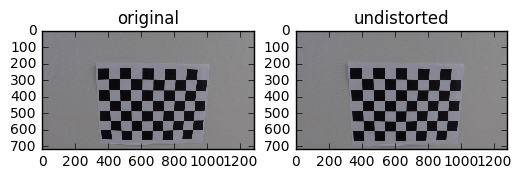

undistorting image... camera_cal/calibration18.jpg


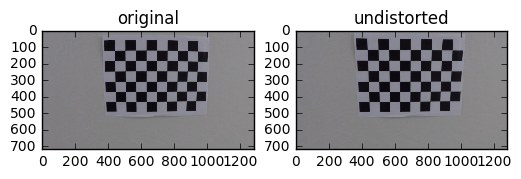

undistorting image... camera_cal/calibration19.jpg


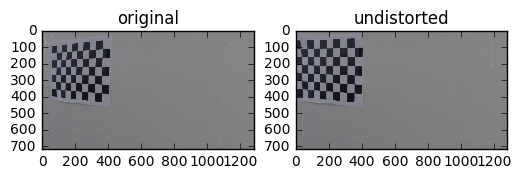

undistorting image... camera_cal/calibration2.jpg


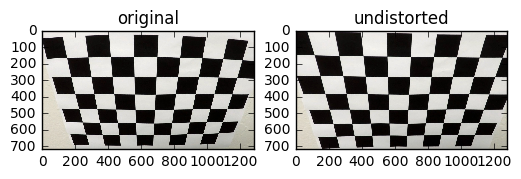

undistorting image... camera_cal/calibration20.jpg


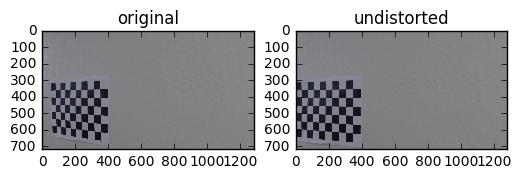

undistorting image... camera_cal/calibration3.jpg


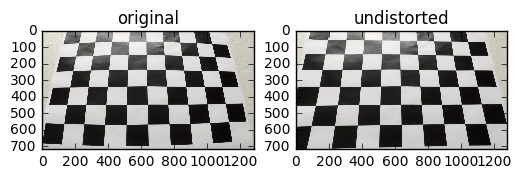

undistorting image... camera_cal/calibration4.jpg


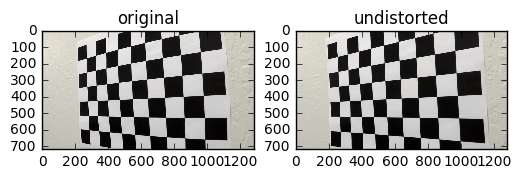

undistorting image... camera_cal/calibration5.jpg


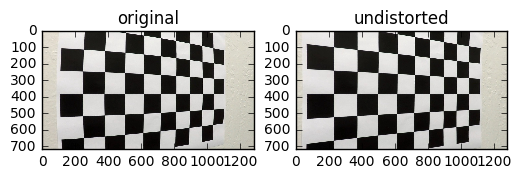

undistorting image... camera_cal/calibration6.jpg


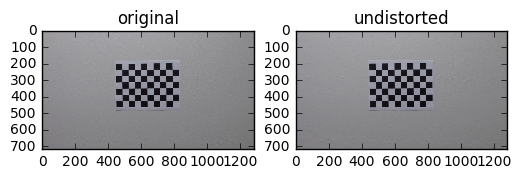

undistorting image... camera_cal/calibration7.jpg


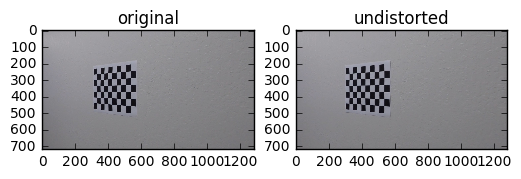

undistorting image... camera_cal/calibration8.jpg


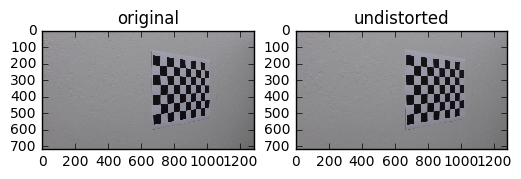

undistorting image... camera_cal/calibration9.jpg


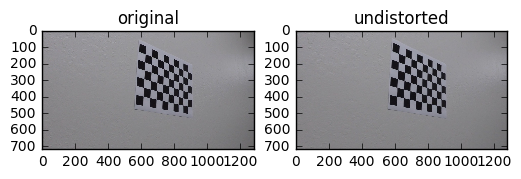

In [2]:
# camera calibration
import glob

# read images
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []
nx = 9
ny = 6

# prepare object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

for idx, fname in enumerate(images):
    plt.figure(idx+1)
    print("finding corners for image..", fname)
    # read image
    img = mpimg.imread(fname)
    
    # display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print("can draw corners:", ret)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.subplot(1, 2, 2)
        plt.imshow(img)

    plt.show()

print("start calibration camera")
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print("show calibrated camera")

for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    print("undistorting image...", fname)
    plt.figure(idx+1)
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(img)

    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    plt.subplot(1,2,2)
    plt.title("undistorted")
    plt.imshow(undistorted)
    plt.show()
    
# save to pickle so no need to run every time
import pickle

with open('calibration.pickle', 'wb') as f:  
    pickle.dump([mtx,dist], f)

In [3]:
import pickle

# load calibration matrix
with open('calibration.pickle', 'rb') as f:
    mtx,dist = pickle.load(f)


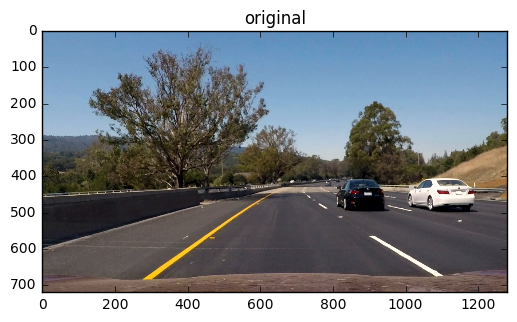

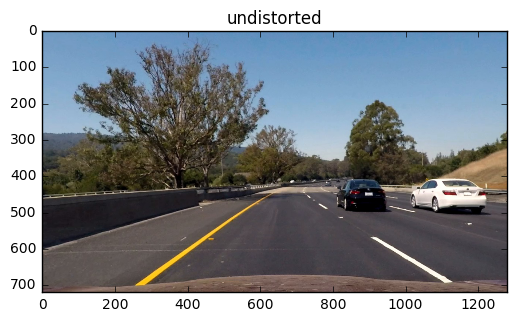

In [4]:
# demonstrate undistort one of sample images from video
%matplotlib inline
fname = 'output_sequence/input_1.jpg'
test_img = mpimg.imread(fname)
test_undistorted = cv2.undistort(test_img, mtx, dist, None, mtx)

plt.figure(1)
plt.title('original')
plt.imshow(test_img)

plt.figure(2)
plt.title('undistorted')
plt.imshow(test_undistorted)

plt.show()

# save
#plt.imsave('output_images/input_1_undistorted.jpg', test_undistorted)


In [5]:
# color transform
def color_threshold(img):
    # R + U
    R = img[:,:,0]
    luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    U = luv[:,:,1]
    
    r_thresh = (220, 255)
    r_binary = np.zeros_like(R)
    r_binary[(R > r_thresh[0]) & (R <= r_thresh[1])] = 1

    u_thresh = (120, 255)
    u_binary = np.zeros_like(U)
    u_binary[(U > u_thresh[0]) & (U <= u_thresh[1])] = 1

    combined_binary = np.zeros_like(R)
    combined_binary[((u_binary == 1) | (r_binary == 1))] = 1
    return combined_binary

In [6]:
def region_of_interest(img, vertices):
    """
    Applies an image mask. Copied from P1.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def region_mask(img):
    buffer_bucket = 15

    xsize,ysize = img.shape[1],img.shape[0]

    x_buffer    = xsize / buffer_bucket

    lower_left  = (x_buffer,       ysize)
    lower_right = (xsize-x_buffer, ysize)
    top_left    = (xsize/2-10,     ysize/2+45) # normally the horizon is towards the bottom half
    top_right   = (xsize/2+10,     ysize/2+45)

    vertices = np.array([[
                lower_left,
                top_left,
                top_right,
                lower_right
            ]], dtype=np.int32)

    region = region_of_interest(img, vertices)

    return region

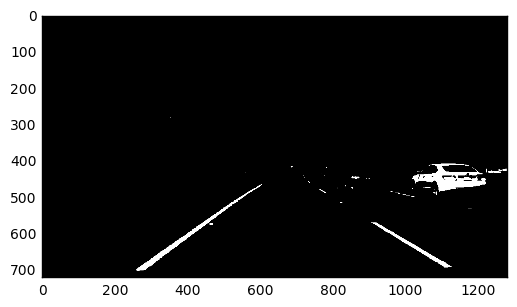

In [7]:
# apply color threshold for the test road image
test_color_threshold = color_threshold(test_undistorted)
%matplotlib inline
plt.imshow(test_color_threshold, cmap='gray')
# save
#plt.imsave('output_images/input_1_color_threshold.jpg', test_color_threshold, cmap='gray')

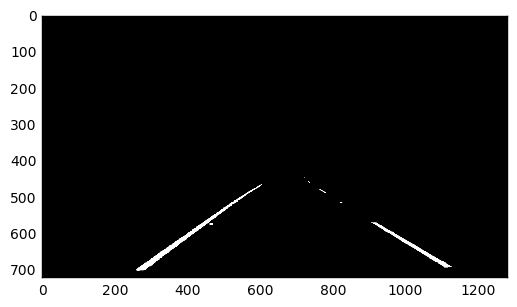

In [8]:
# apply regional mask for test road image
test_regional_mask = region_mask(test_color_threshold)
%matplotlib inline
plt.imshow(test_regional_mask, cmap='gray')
# save
#plt.imsave('output_images/input_1_regional_mask.jpg', test_regional_mask, cmap='gray')

In [9]:
# perspective tranform, this is based on straight_lines1.jpg
# only run once
src = np.float32(
    [
        [765,504], #top right
        [1060,700], #bottom right
        [240,700], #bottom left
        [525,500], #top left
    ]
)

dst = np.float32(
    [
        [800,450],
        [800,700],
        [200,700],
        [200,450]
    ]
)

M = cv2.getPerspectiveTransform(src,dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# save perspective transform
with open('perspective.pickle', 'wb') as f:  
    pickle.dump([M,Minv], f)

In [10]:
# load perspective transform
with open('perspective.pickle', 'rb') as f:
    M,Minv = pickle.load(f)

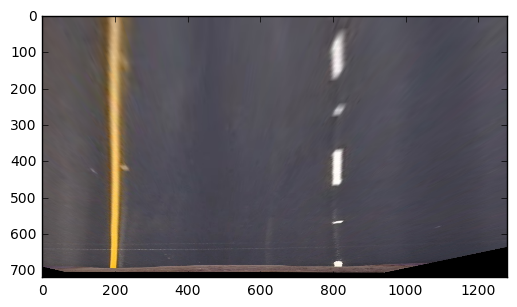

In [11]:
# demonstrate perspective transform results in parallel lane for straight_lines1.jpg
straight_lines1 = mpimg.imread('output_images/straight_lines1.jpg')
straight_lines1_size = (straight_lines1.shape[1], straight_lines1.shape[0])

straight_lines1_warped = cv2.warpPerspective(straight_lines1, M, straight_lines1_size, flags=cv2.INTER_LINEAR)

%matplotlib inline
plt.imshow(straight_lines1_warped)

#save
#plt.imsave('output_images/straight_lines1_warped.jpg',straight_lines1_warped)

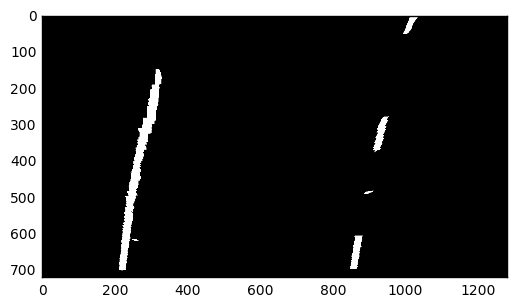

In [12]:
# demonstrate perspective transform of the road image example:
test_size = (test_regional_mask.shape[1], test_regional_mask.shape[0])

test_warped = cv2.warpPerspective(test_regional_mask, M, test_size, flags=cv2.INTER_LINEAR)

%matplotlib inline
plt.imshow(test_warped, cmap='gray')

#save
#plt.imsave('output_images/input_1_warped.jpg',test_warped,cmap='gray')

In [13]:
def histogram_search(img):
    # get histogram
    histogram = np.sum(img[int(img.shape[0]/2):,:], axis=0)
    
    # fit polynomial
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    window_size = 100
    
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_size
        win_y_high = img.shape[0] - window*window_size
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    return leftx, lefty, rightx, righty

In [14]:
def histogram_search_next(img, left_fit, right_fit):
    #print("searching from last histogram")
    # carry over from previous fit
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    return leftx, lefty, rightx, righty

(720, 0)

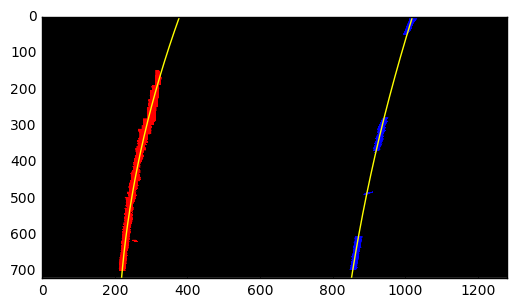

In [15]:
# example of histogram search
# get pixels
test_leftx,test_lefty,test_rightx,test_righty = histogram_search(test_warped)
# polynomial fit
test_left_fit = np.polyfit(test_lefty, test_leftx, 2)
test_right_fit = np.polyfit(test_righty, test_rightx, 2)

test_fity = np.linspace(0, test_warped.shape[0]-1, test_warped.shape[0] )
test_fit_leftx = test_left_fit[0]*test_fity**2 + test_left_fit[1]*test_fity + test_left_fit[2]
test_fit_rightx = test_right_fit[0]*test_fity**2 + test_right_fit[1]*test_fity + test_right_fit[2]

# display
test_polynomial = np.dstack((test_warped, test_warped, test_warped))*255
test_polynomial[test_lefty, test_leftx] = [255, 0, 0]
test_polynomial[test_righty, test_rightx] = [0, 0, 255]

plt.imshow(test_polynomial)

plt.plot(test_fit_leftx, test_fity, color='yellow')
plt.plot(test_fit_rightx, test_fity, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [16]:
# curvature
def get_curvature(leftx, lefty, rightx, righty, shape):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    y_eval = shape[0] * ym_per_pix

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    return left_curverad, right_curverad



In [17]:
# calculate vehicle position
def get_off_center(undistorted, lane_info):
    # calculate how much car is off center
    left_fit, right_fit = lane_info.left_fit, lane_info.right_fit
    
    bottom_left_x = left_fit[0]*700**2 + left_fit[1]*700 + left_fit[2]
    bottom_right_x = right_fit[0]*700**2 + right_fit[1]*700 + right_fit[2]
    xm_per_pix = 3.7/700
    screen_middle_pixel = undistorted.shape[1]/2
    
    # transform back
    a = np.array([[[bottom_left_x, 700],[bottom_right_x, 700]]],dtype=np.float32)
    transformed = cv2.perspectiveTransform(a, Minv)
    
    transformed_left_x = transformed[0][0][0]
    transformed_right_x = transformed[0][1][0]
    
    car_middle_pixel = int((transformed_left_x + transformed_right_x)/2)
    screen_off_center = car_middle_pixel-screen_middle_pixel
    meters_off_center = xm_per_pix * screen_off_center
    
    return meters_off_center


In [18]:
# draw back
def draw_back(undistorted, warped, lane_info):
    left_fit, right_fit = lane_info.left_fit, lane_info.right_fit
    # Generate x and y values for plotting
    fity = np.linspace(0, img.shape[0]-1, img.shape[0] )
    fit_leftx = left_fit[0]*fity**2 + left_fit[1]*fity + left_fit[2]
    fit_rightx = right_fit[0]*fity**2 + right_fit[1]*fity + right_fit[2]
    
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([fit_leftx, fity]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([fit_rightx, fity])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    
    # add text for curvature and off center
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(result,'Curvature: {0:.4f}m'.format(lane_info.curvature),(10,700), font, 1,(255,255,255),2)
    
    meters_off_center = get_off_center(undistorted, lane_info)
    cv2.putText(result,'Vehicle position: meters right of image center: {0:.4f}m'.format(meters_off_center),(10,650), font, 1,(255,255,255),2)
    
    
    return result

In [19]:
# handy utility functions
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

def perspective_transform(img):
    
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped



In [20]:
class LaneInfo():
    def __init__(self, left_fit, right_fit, curvature):
        self.left_fit = left_fit
        self.right_fit = right_fit
        self.curvature = curvature
    

In [21]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # first pass?
        self.first_pass = True
        #radius of curvature of the line in some units
        self.curvatures = []
        #current fit
        self.best_fit_lefts = []
        self.best_fit_rights = []
        #count, save images for debug
        self.count = 0
                
    def get_histogram_search(self, warped):
        if self.first_pass:
            return histogram_search(warped)
        else:
            return histogram_search_next(warped, self.current_fit_x, self.current_fit_y)
        
    def get_fit(self, leftx, lefty, rightx, righty, shape):
        offset = 3
        curvature_threshold = 200
        if self.first_pass:
            self.first_pass = False
            left_fit = np.polyfit(lefty, leftx, 2)
            right_fit = np.polyfit(righty, rightx, 2)
            # save curvature
            curvatures = get_curvature(leftx,lefty,rightx,righty, shape)
            self.curvatures.append(curvatures[0])
            self.curvatures.append(curvatures[1])
            # save fit
            self.best_fit_lefts.append(left_fit)
            self.best_fit_rights.append(right_fit)
            return LaneInfo(
                left_fit, 
                right_fit,
                np.mean(np.array(self.curvatures[-1*offset:]))
                )
        else:
            
            try:
                curvature = get_curvature(leftx,lefty,rightx,righty, shape)
                left_fit = np.polyfit(lefty, leftx, 2)
                right_fit = np.polyfit(righty, rightx, 2)
                
                if left_fit[0] * right_fit[0] >= 0: # same direction
                    if curvature[0] >= curvature_threshold and curvature[1] >= curvature_threshold:
                        # filter out drastic polynomial fits
                        self.best_fit_lefts.append(np.polyfit(lefty, leftx, 2))
                        self.best_fit_rights.append(np.polyfit(righty,rightx,2))
                        self.curvatures.append(curvature[0])
                        self.curvatures.append(curvature[1])
                else:
                    #print("diff direction!")
                    pass
            except:
                pass
                        
            return LaneInfo(
                # average last 3 measurements for smoothing effect
                np.mean(np.array(self.best_fit_lefts[-1*offset:]), axis=0).tolist(),
                np.mean(np.array(self.best_fit_rights[-1*offset:]), axis=0).tolist(),
                np.mean(np.array(self.curvatures[-2*offset:]))
                )
            

In [22]:
def pipeline(img, line):
    
    #undistort
    undistorted = undistort(img)
    
    #color threshold
    combined_binary = color_threshold(undistorted)
    
    # region of interest
    region = region_mask(combined_binary)
    
    # perspective transform
    warped = perspective_transform(region)
    
    # get histogram search
    leftx,lefty,rightx,righty = line.get_histogram_search(warped)
    #print("leftx:", len(leftx), "rightx:", len(rightx))
    
    lane_info = line.get_fit(leftx,lefty,rightx,righty,img.shape)
    line.current_fit_x, line.current_fit_y = lane_info.left_fit, lane_info.right_fit
    
    # draw back
    result = draw_back(undistorted, warped, lane_info)
    
    return result, lane_info

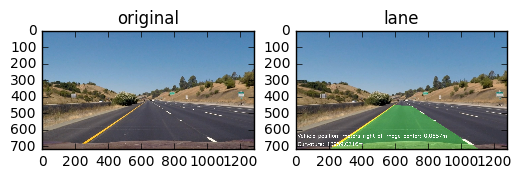

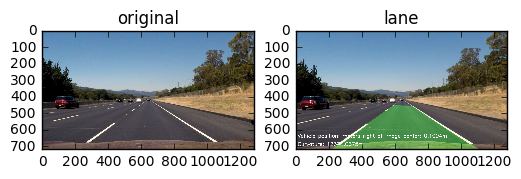

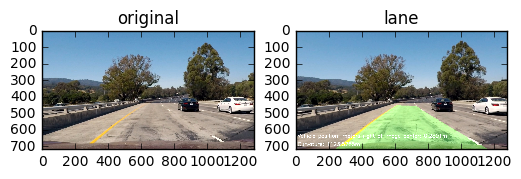

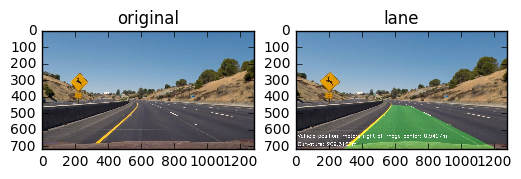

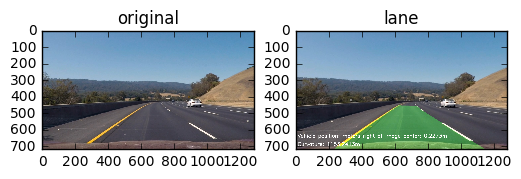

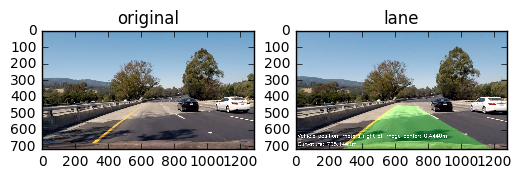

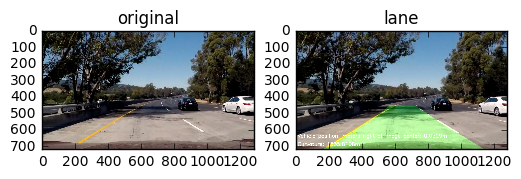

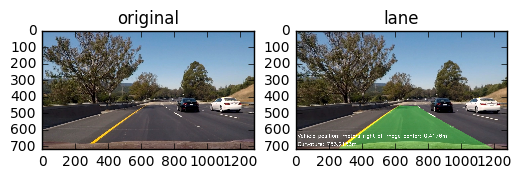

In [23]:
import glob
images = glob.glob('test_images/*.jpg')

line = Line()

for idx, fname in enumerate(images):
    line = Line()
    img = mpimg.imread(fname)
    #print("applying lane to image...", fname)
    plt.figure(idx+1)
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(img)
    
    lane, lane_info = pipeline(img, line)
    plt.subplot(1,2,2)
    plt.title("lane")
    plt.imshow(lane, cmap='gray')
    plt.show()

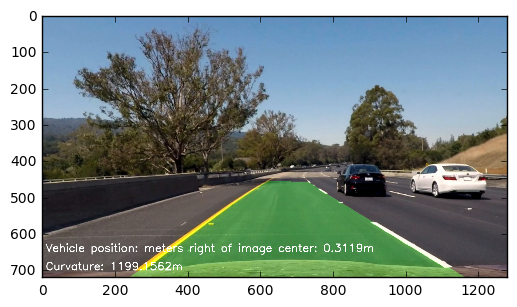

In [24]:
# test on road image
line = Line()

fname = 'output_images/input_1.jpg'
img = mpimg.imread(fname)
lane, lane_info = pipeline(img, line)
plt.imshow(lane)

#save
plt.imsave('output_images/input_1_final.jpg', lane)


In [25]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [26]:
%matplotlib inline
line = Line()
def process_image(img):
    global line
    res, lane_info = pipeline(img, line)
    line.count += 1
    # save img and res, for debugging purpose
    #img_save = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #res_save = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
    #cv2.imwrite("output_sequence/input_" + str(line.count) + ".jpg", img_save)
    #cv2.imwrite("output_sequence/output" + str(line.count) + ".jpg", res_save)
    #print("img saved ", line.count)
    
    return res

In [27]:
output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
clip = clip1.fl_image(process_image)
%time clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [04:24<00:00,  4.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 7min 55s, sys: 5.53 s, total: 8min
Wall time: 4min 25s


In [28]:
print(len(line.best_fit_lefts))
print(len(line.best_fit_rights))

1053
1053


In [29]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))